In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("car.csv")

In [3]:
df.head()

symboling normalized-losses         make fuel-type   body-style  \
0          3                 ?  alfa-romero       gas  convertible   
1          3                 ?  alfa-romero       gas  convertible   
2          1                 ?  alfa-romero       gas    hatchback   
3          2               164         audi       gas        sedan   
4          2               164         audi       gas        sedan   

  drive-wheels engine-location  width  height engine-type  engine-size  \
0          rwd           front   64.1    48.8        dohc          130   
1          rwd           front   64.1    48.8        dohc          130   
2          rwd           front   65.5    52.4        ohcv          152   
3          fwd           front   66.2    54.3         ohc          109   
4          4wd           front   66.4    54.3         ohc          136   

  horsepower  city-mpg  highway-mpg  price  
0        111        21           27  13495  
1        111        21           27  16500  
2        154        19           26  16500  
3        102        24           30  13950  
4        115        18           22  17450

In [4]:
df = df.applymap(lambda x: x if x!="?" else np.nan)

In [5]:
df.head()

symboling normalized-losses         make fuel-type   body-style  \
0          3               NaN  alfa-romero       gas  convertible   
1          3               NaN  alfa-romero       gas  convertible   
2          1               NaN  alfa-romero       gas    hatchback   
3          2               164         audi       gas        sedan   
4          2               164         audi       gas        sedan   

  drive-wheels engine-location  width  height engine-type  engine-size  \
0          rwd           front   64.1    48.8        dohc          130   
1          rwd           front   64.1    48.8        dohc          130   
2          rwd           front   65.5    52.4        ohcv          152   
3          fwd           front   66.2    54.3         ohc          109   
4          4wd           front   66.4    54.3         ohc          136   

  horsepower  city-mpg  highway-mpg  price  
0        111        21           27  13495  
1        111        21           27  16500  
2        154        19           26  16500  
3        102        24           30  13950  
4        115        18           22  17450

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         203 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 24.1+ KB


In [7]:
df.describe()

symboling       width      height  engine-size    city-mpg  \
count  205.000000  205.000000  205.000000   205.000000  205.000000   
mean     0.834146   65.907805   53.724878   126.907317   25.219512   
std      1.245307    2.145204    2.443522    41.642693    6.542142   
min     -2.000000   60.300000   47.800000    61.000000   13.000000   
25%      0.000000   64.100000   52.000000    97.000000   19.000000   
50%      1.000000   65.500000   54.100000   120.000000   24.000000   
75%      2.000000   66.900000   55.500000   141.000000   30.000000   
max      3.000000   72.300000   59.800000   326.000000   49.000000   

       highway-mpg         price  
count   205.000000    205.000000  
mean     30.751220  13227.478049  
std       6.886443   7902.651615  
min      16.000000   5118.000000  
25%      25.000000   7788.000000  
50%      30.000000  10345.000000  
75%      34.000000  16500.000000  
max      54.000000  45400.000000

In [8]:
df[["normalized-losses","horsepower"]] = df[["normalized-losses","horsepower"]].apply(pd.to_numeric)
min_symboling = np.min(df["symboling"])
df["symboling"] = df["symboling"].apply(lambda x:x-min_symboling)

In [9]:
np.sum(df.isnull())

symboling             0
normalized-losses    41
make                  0
fuel-type             0
body-style            0
drive-wheels          0
engine-location       0
width                 0
height                0
engine-type           0
engine-size           0
horsepower            2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

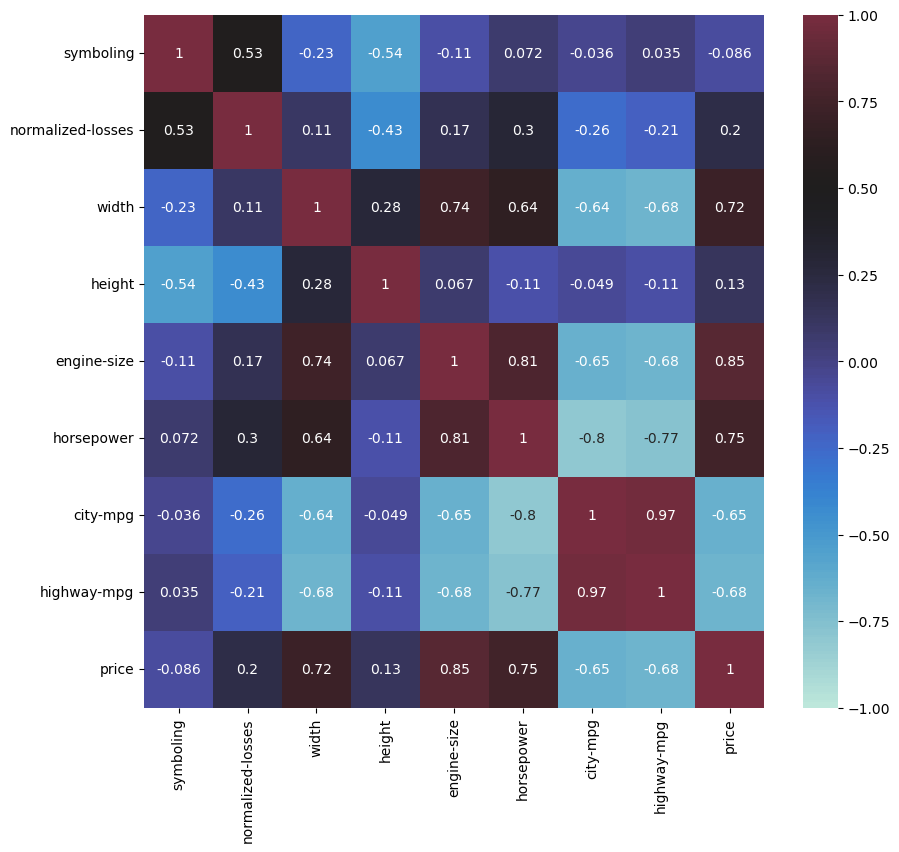

In [10]:
fig,ax = plt.subplots(1,1,figsize=(10,9))
sns.heatmap(df.corr(),center=0.5,vmin=-1,vmax=1,annot=True,ax=ax)
plt.show()

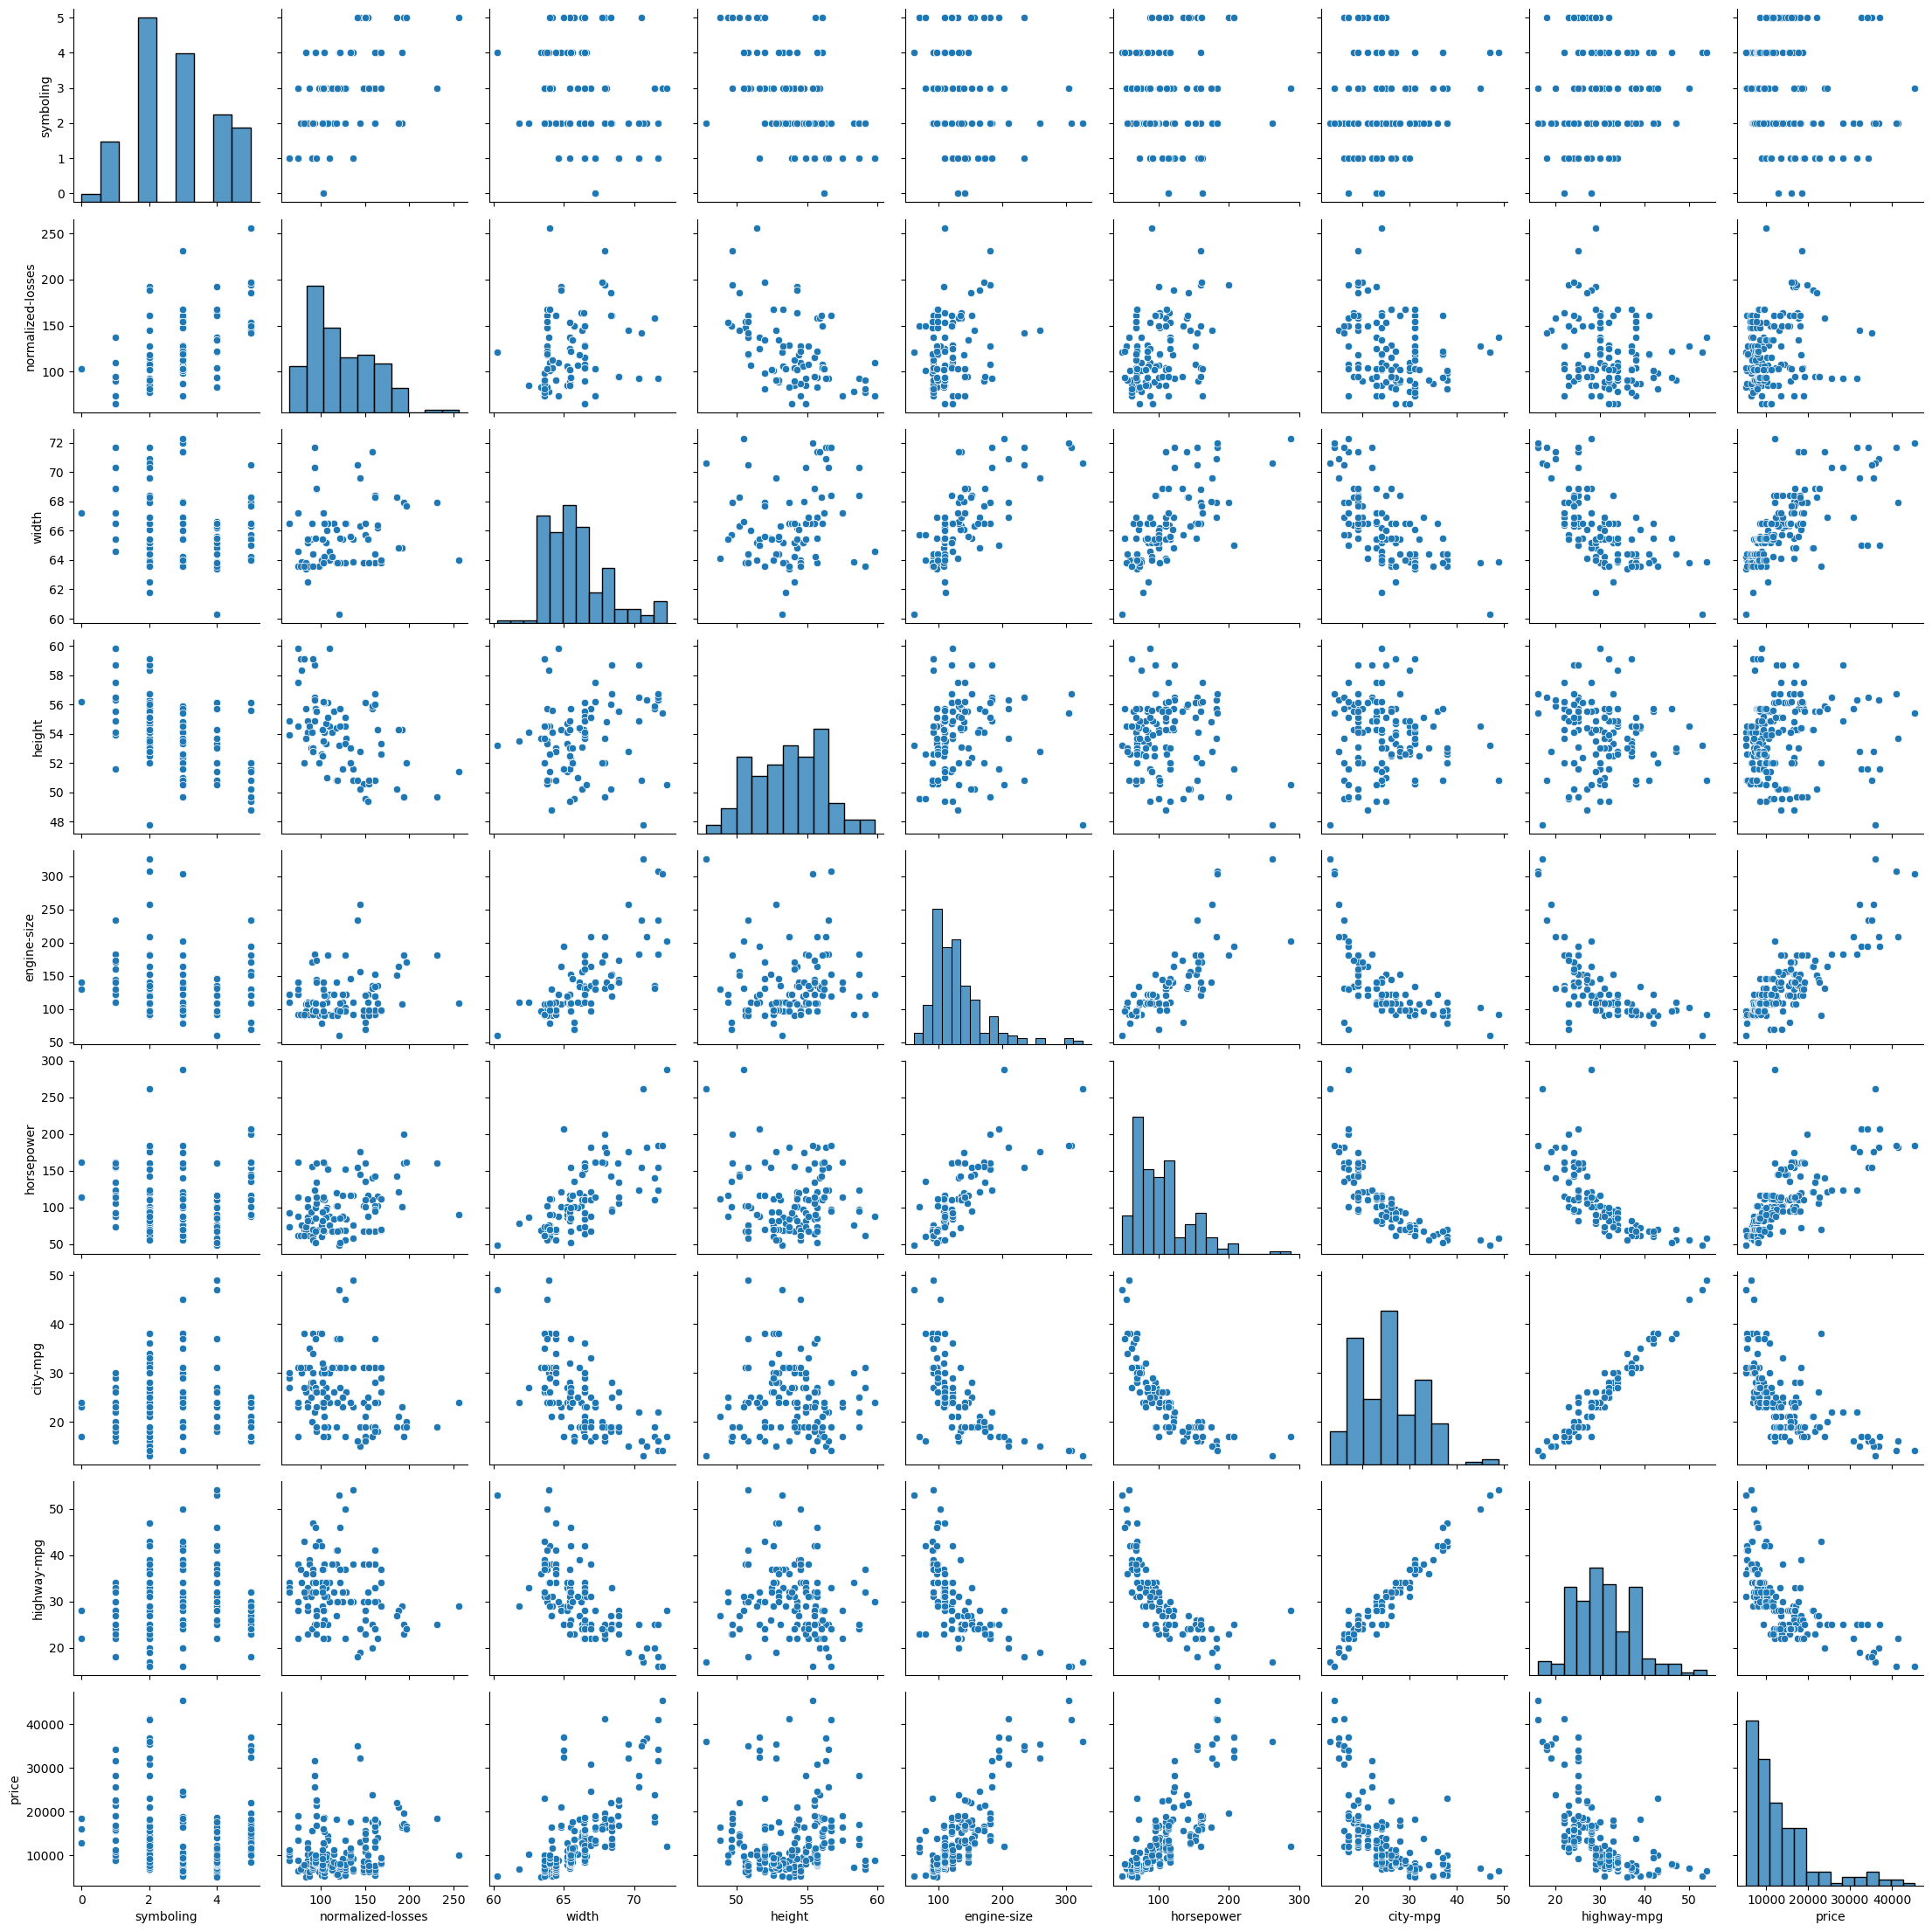

In [11]:
sns.pairplot(df)
plt.show()

In [12]:
cat_df = df.select_dtypes(exclude=["number"])
cat_df.head()

make fuel-type   body-style drive-wheels engine-location engine-type
0  alfa-romero       gas  convertible          rwd           front        dohc
1  alfa-romero       gas  convertible          rwd           front        dohc
2  alfa-romero       gas    hatchback          rwd           front        ohcv
3         audi       gas        sedan          fwd           front         ohc
4         audi       gas        sedan          4wd           front         ohc

In [13]:
import math

def mult_cat_plot(df,cats,plot):
    row,col = len(cats),1
       
    fig, ax = plt.subplots(nrows=row,ncols=col,figsize=(25,40),squeeze=False,tight_layout=True)
    row,col =0,0
    
    for cat in cats:
        plot(df[cat],ax=ax[row][col])
        ax[row][col].margins(x=0)
        ax
        row+=1
    

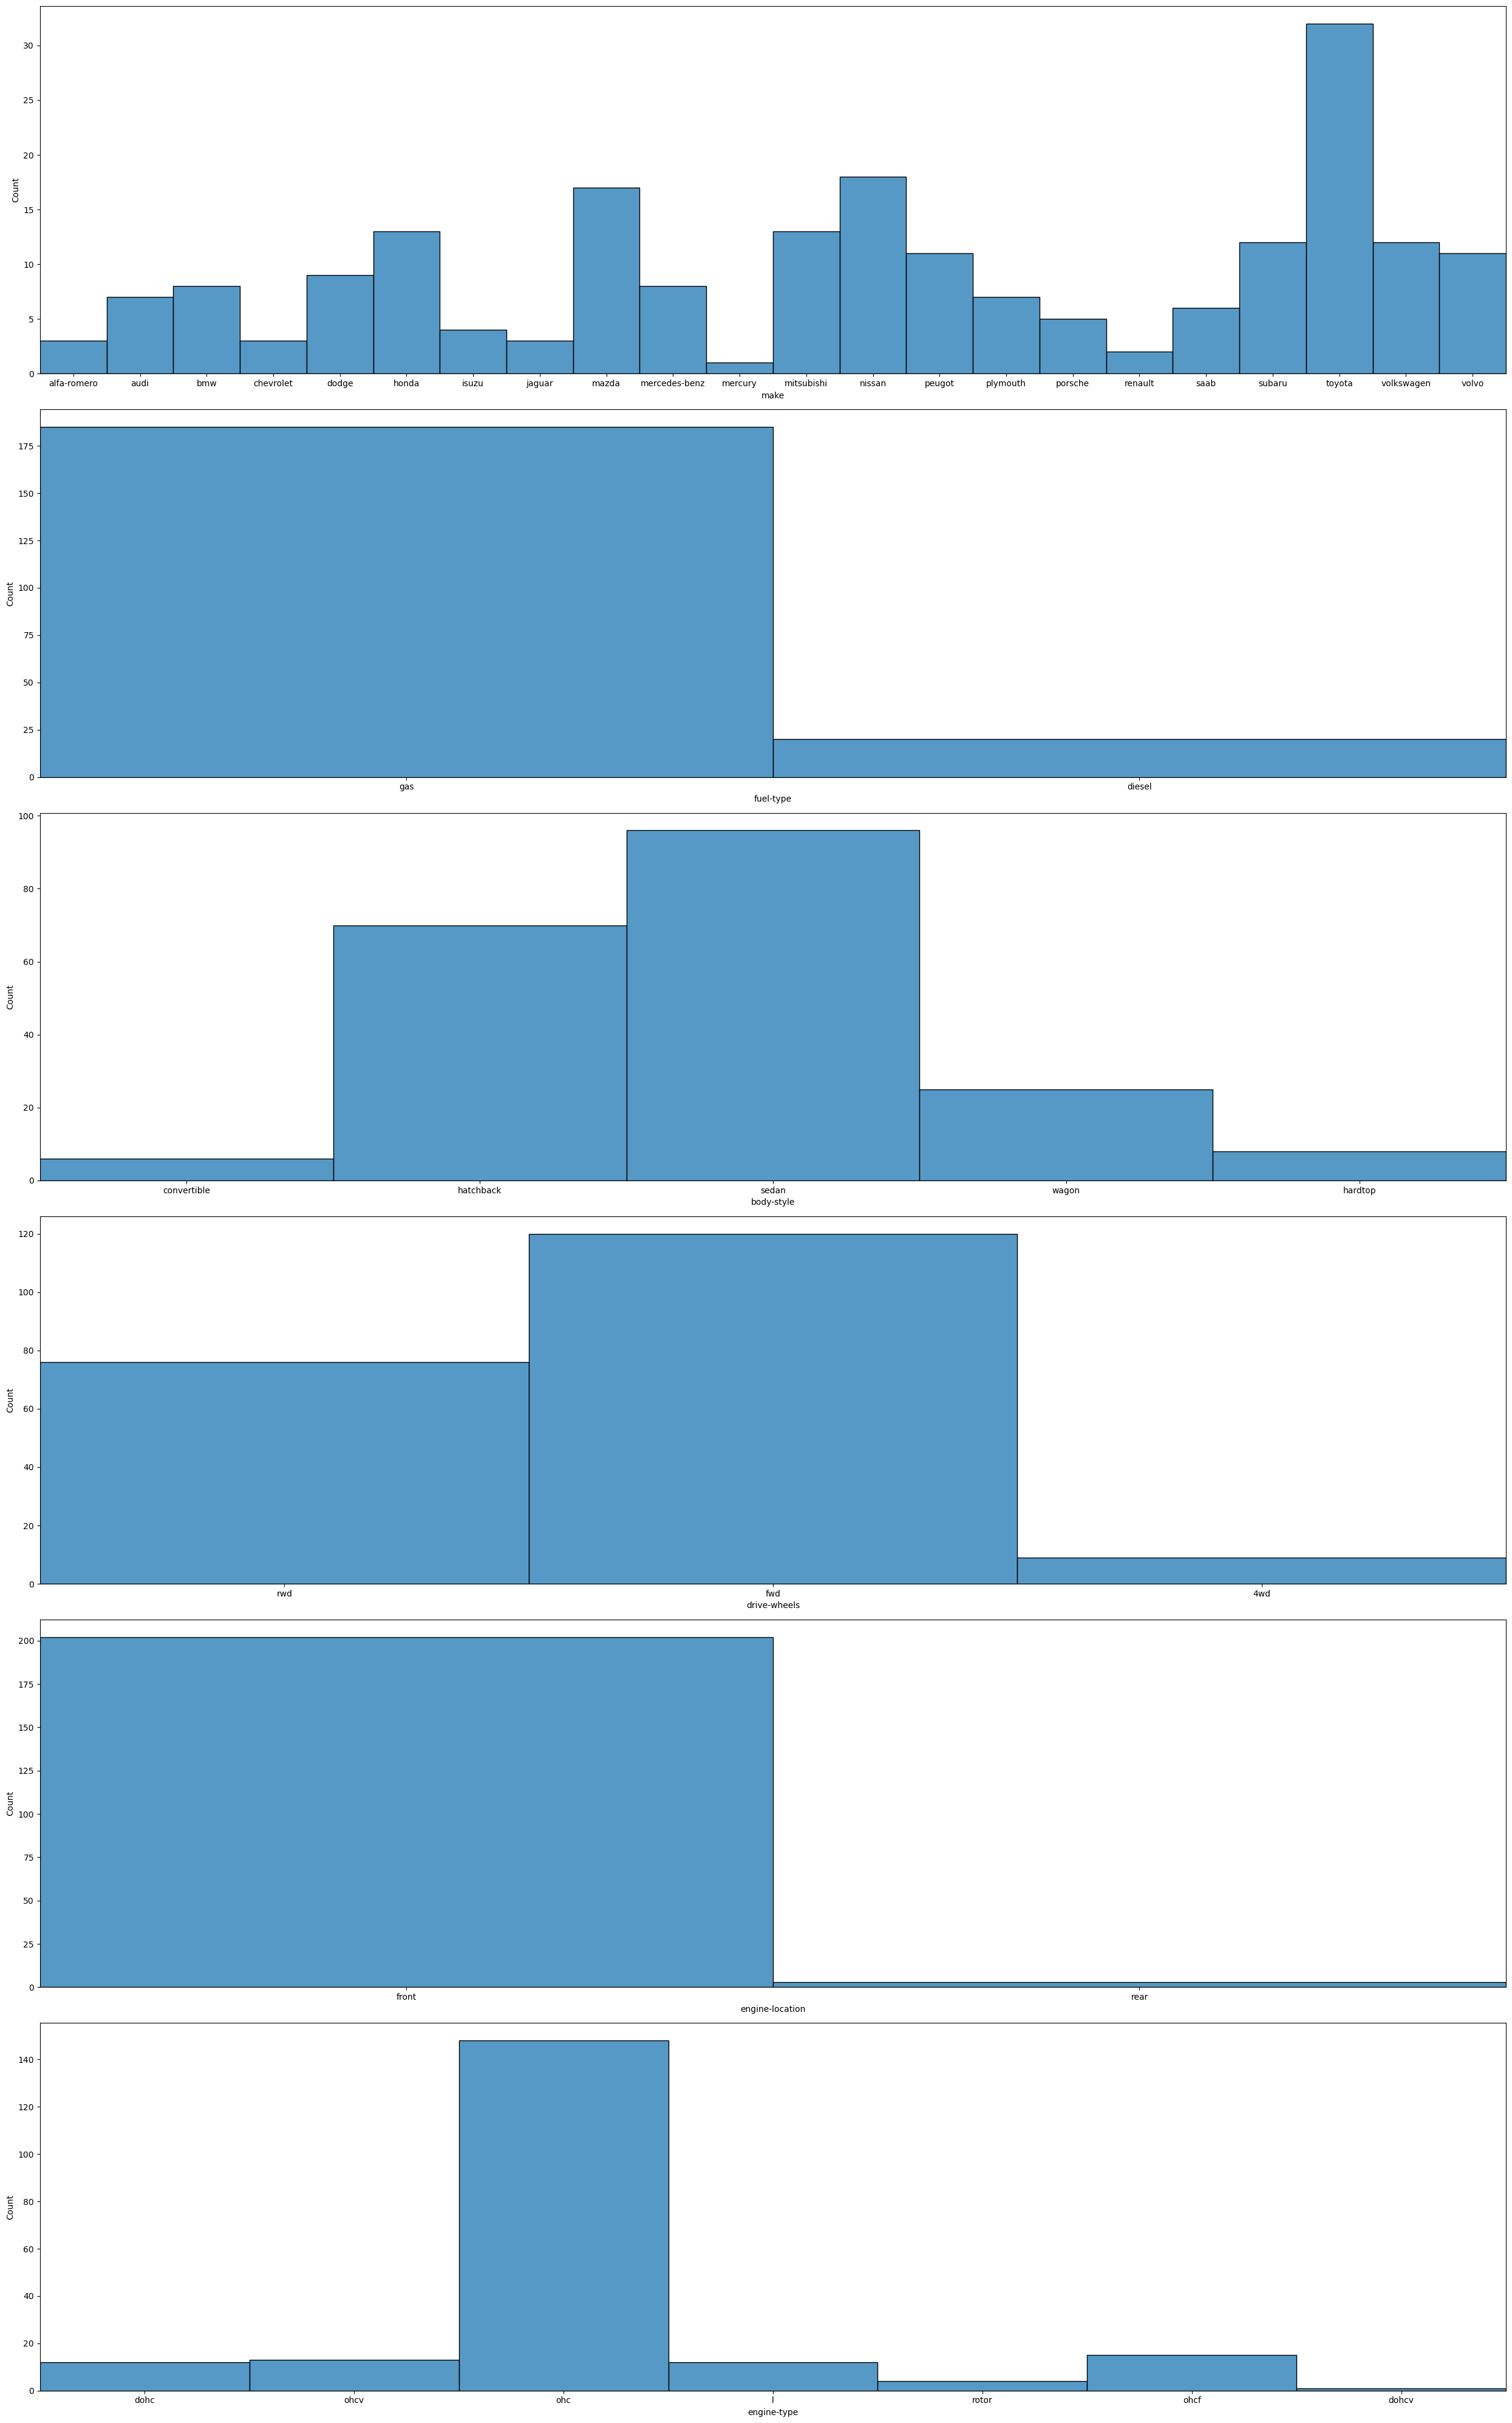

In [14]:
mult_cat_plot(cat_df,cat_df.columns,sns.histplot)

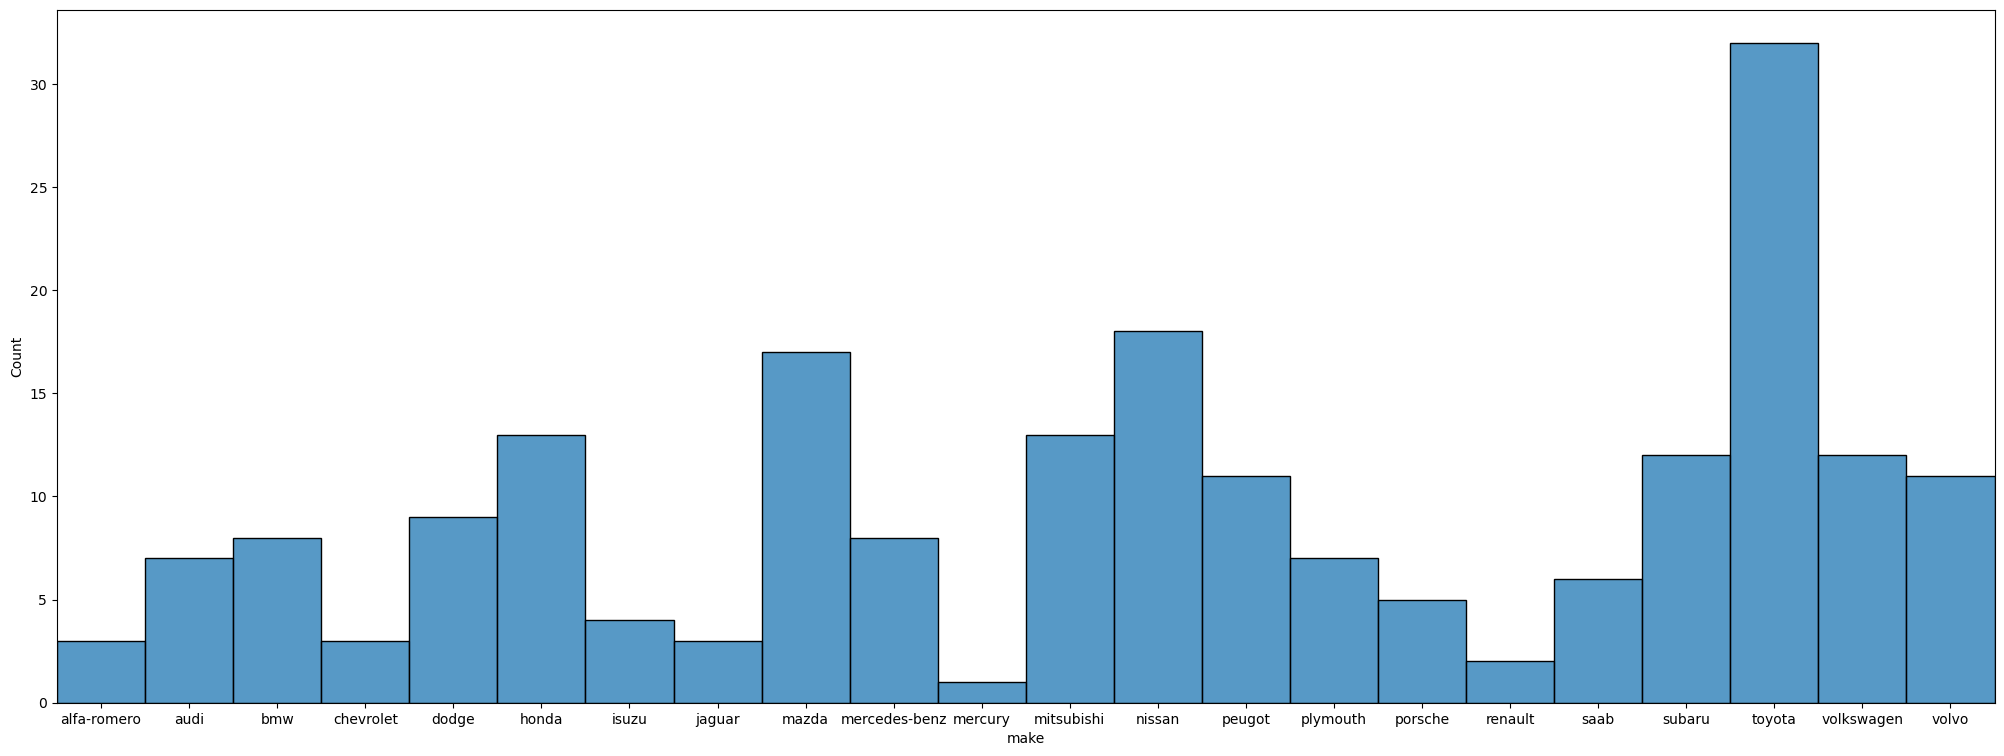

In [15]:
fig,ax = plt.subplots(1,1,figsize=(25,9))
sns.histplot(cat_df["make"],ax=ax)
ax.margins(x=0)

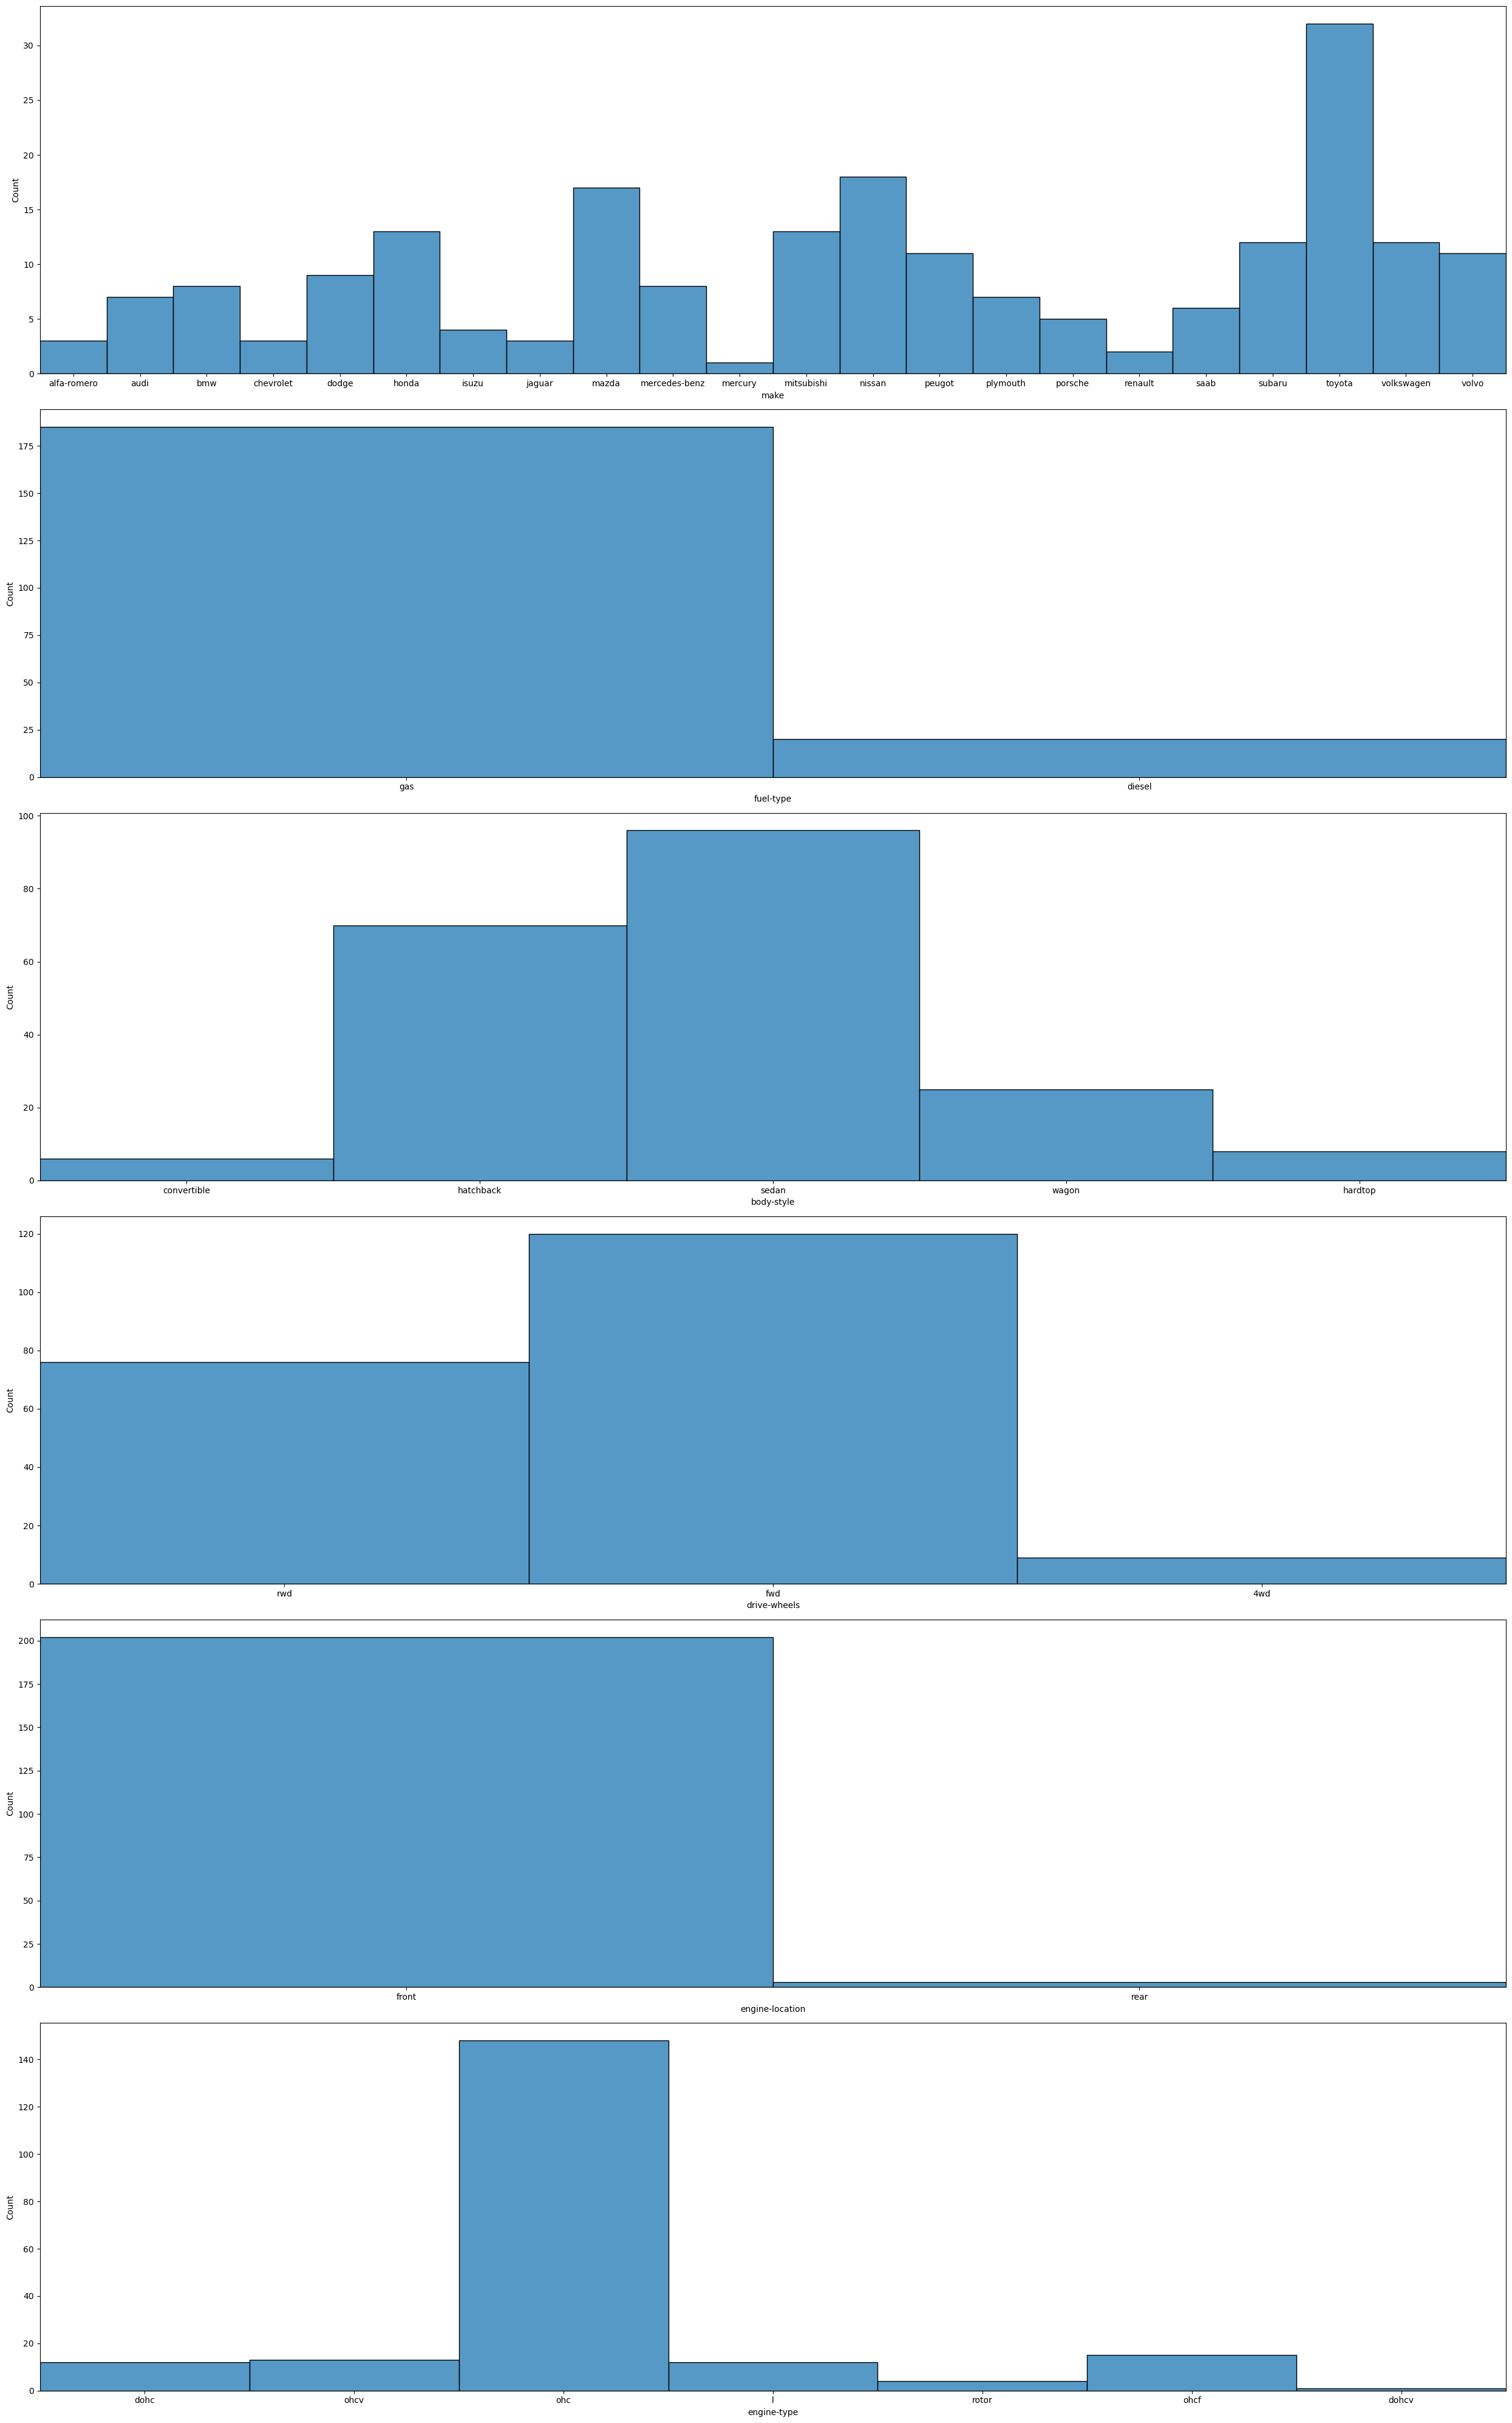

In [16]:
mult_cat_plot(cat_df,cat_df.columns,sns.histplot)

# T-test on regression analysis 
- Dependent Variable: price
- Independent Variable: Horse Power

In [17]:
df.head()

symboling  normalized-losses         make fuel-type   body-style  \
0          5                NaN  alfa-romero       gas  convertible   
1          5                NaN  alfa-romero       gas  convertible   
2          3                NaN  alfa-romero       gas    hatchback   
3          4              164.0         audi       gas        sedan   
4          4              164.0         audi       gas        sedan   

  drive-wheels engine-location  width  height engine-type  engine-size  \
0          rwd           front   64.1    48.8        dohc          130   
1          rwd           front   64.1    48.8        dohc          130   
2          rwd           front   65.5    52.4        ohcv          152   
3          fwd           front   66.2    54.3         ohc          109   
4          4wd           front   66.4    54.3         ohc          136   

   horsepower  city-mpg  highway-mpg  price  
0       111.0        21           27  13495  
1       111.0        21           27  16500  
2       154.0        19           26  16500  
3       102.0        24           30  13950  
4       115.0        18           22  17450

- Symboling and Normalized losses are related to insurance risk dropping them
- Regression analysis required numeric values converting object type using OneHotEncoding 

In [18]:
df_og = df.copy()
df = pd.get_dummies(df.drop(["symboling","normalized-losses"],axis=1)).fillna(0)

In [19]:
df.T

0        1        2        3        4        5    \
width                      64.1     64.1     65.5     66.2     66.4     66.3   
height                     48.8     48.8     52.4     54.3     54.3     53.1   
engine-size               130.0    130.0    152.0    109.0    136.0    136.0   
horsepower                111.0    111.0    154.0    102.0    115.0    110.0   
city-mpg                   21.0     21.0     19.0     24.0     18.0     19.0   
highway-mpg                27.0     27.0     26.0     30.0     22.0     25.0   
price                   13495.0  16500.0  16500.0  13950.0  17450.0  15250.0   
make_alfa-romero            1.0      1.0      1.0      0.0      0.0      0.0   
make_audi                   0.0      0.0      0.0      1.0      1.0      1.0   
make_bmw                    0.0      0.0      0.0      0.0      0.0      0.0   
make_chevrolet              0.0      0.0      0.0      0.0      0.0      0.0   
make_dodge                  0.0      0.0      0.0      0.0      0.0      0.0   
make_honda                  0.0      0.0      0.0      0.0      0.0      0.0   
make_isuzu                  0.0      0.0      0.0      0.0      0.0      0.0   
make_jaguar                 0.0      0.0      0.0      0.0      0.0      0.0   
make_mazda                  0.0      0.0      0.0      0.0      0.0      0.0   
make_mercedes-benz          0.0      0.0      0.0      0.0      0.0      0.0   
make_mercury                0.0      0.0      0.0      0.0      0.0      0.0   
make_mitsubishi             0.0      0.0      0.0      0.0      0.0      0.0   
make_nissan                 0.0      0.0      0.0      0.0      0.0      0.0   
make_peugot                 0.0      0.0      0.0      0.0      0.0      0.0   
make_plymouth               0.0      0.0      0.0      0.0      0.0      0.0   
make_porsche                0.0      0.0      0.0      0.0      0.0      0.0   
make_renault                0.0      0.0      0.0      0.0      0.0      0.0   
make_saab                   0.0      0.0      0.0      0.0      0.0      0.0   
make_subaru                 0.0      0.0      0.0      0.0      0.0      0.0   
make_toyota                 0.0      0.0      0.0      0.0      0.0      0.0   
make_volkswagen             0.0      0.0      0.0      0.0      0.0      0.0   
make_volvo                  0.0      0.0      0.0      0.0      0.0      0.0   
fuel-type_diesel            0.0      0.0      0.0      0.0      0.0      0.0   
fuel-type_gas               1.0      1.0      1.0      1.0      1.0      1.0   
body-style_convertible      1.0      1.0      0.0      0.0      0.0      0.0   
body-style_hardtop          0.0      0.0      0.0      0.0      0.0      0.0   
body-style_hatchback        0.0      0.0      1.0      0.0      0.0      0.0   
body-style_sedan            0.0      0.0      0.0      1.0      1.0      1.0   
body-style_wagon            0.0      0.0      0.0      0.0      0.0      0.0   
drive-wheels_4wd            0.0      0.0      0.0      0.0      1.0      0.0   
drive-wheels_fwd            0.0      0.0      0.0      1.0      0.0      1.0   
drive-wheels_rwd            1.0      1.0      1.0      0.0      0.0      0.0   
engine-location_front       1.0      1.0      1.0      1.0      1.0      1.0   
engine-location_rear        0.0      0.0      0.0      0.0      0.0      0.0   
engine-type_dohc            1.0      1.0      0.0      0.0      0.0      0.0   
engine-type_dohcv           0.0      0.0      0.0      0.0      0.0      0.0   
engine-type_l               0.0      0.0      0.0      0.0      0.0      0.0   
engine-type_ohc             0.0      0.0      0.0      1.0      1.0      1.0   
engine-type_ohcf            0.0      0.0      0.0      0.0      0.0      0.0   
engine-type_ohcv            0.0      0.0      1.0      0.0      0.0      0.0   
engine-type_rotor           0.0      0.0      0.0      0.0      0.0      0.0   

                            6        7        8        9    ...      195  \
width                      71.4

In [20]:
X,y = df["horsepower"].values, df["price"]

### Using scipy

In [21]:
from scipy.stats import linregress

result = linregress(X,y)

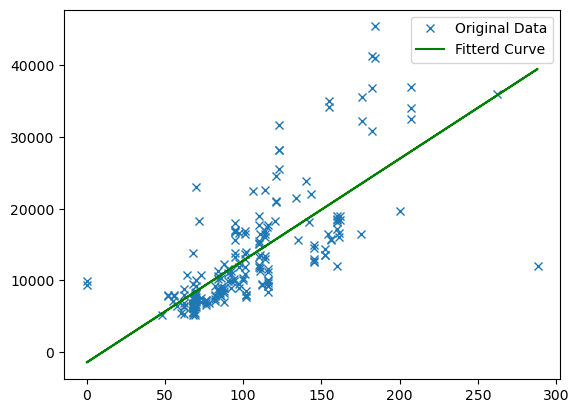

In [22]:
plt.plot(X,y,'x',label="Original Data")
plt.plot(X,result.intercept+result.slope*X,'g',label="Fitterd Curve")
plt.legend()
plt.show()

- Hypothesis:$\\$
    Null hypothesis: $H_{0}$: Slope = 0  $\newline$
    Alternate hypothesis: $H_{a}$: Slope $\neq$ 0

In [23]:
from scipy.stats import t
# Two tail test
tscore =result.slope/result.stderr
tcritical = t.ppf(1-0.05/2,df=X.shape[0]-1-1)

In [24]:
print(f"T-score: {tscore} T-critical: {tcritical}")

T-score: 15.402278510216304 T-critical: 1.9717188484613175


- tscore > tcritical, rejecting Null Hypothesis 
- Therefore, slope $\neq$ 0

- Hypothesis:$\\$
    Null hypothesis: $H_{0}$: Intercept = 0  $\newline$
    Alternate hypothesis: $H_{a}$: Intercept $\neq$ 0

In [25]:
tscore =result.slope/result.intercept_stderr
tcritical = t.ppf(1-0.05/2,df=X.shape[0]-1-1)
print(f"T-score: {tscore} T-critical: {tcritical}")

T-score: 0.13877923964204616 T-critical: 1.9717188484613175


- tscore < tcritical, accepting Null Hypothesis 
- Therefore, intercept = 0

In [26]:
from sklearn.metrics import mean_squared_error

print(f"RMSE with Intercept: {np.sqrt(mean_squared_error(y,result.intercept+result.slope*X))}")

print(f"RMSE without Intercept: {np.sqrt(mean_squared_error(y,result.slope*X))}")

RMSE with Intercept: 5353.269418669642
RMSE without Intercept: 5543.569314983592
